IMPORTAZIONE LIBRERIE E CARICAMENTO DATAFRAME

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [2]:
CSV_files = {
    "customers":           r"dataset/olist_customers_dataset.csv",
    "geolocation_dataset": r"dataset/olist_geolocation_dataset.csv",
    "order_items":         r"dataset/olist_order_items_dataset.csv",
    "order_payments":      r"dataset/olist_order_payments_dataset.csv",
    "order_review":        r"dataset/olist_order_reviews_dataset.csv",
    "order_dataset":       r"dataset/olist_orders_dataset.csv",
    "list_product":        r"dataset/olist_products_dataset.csv",
    "list_seller":         r"dataset/olist_sellers_dataset.csv",
    "product_category":    r"dataset/product_category_name_translation.csv"
}

dataframes = {name: pd.read_csv(path) for name, path in CSV_files.items()}

df_customers           = dataframes["customers"]
df_orders_items        = dataframes["order_items"]
df_order_payments      = dataframes["order_payments"]
df_order_review        = dataframes["order_review"]
df_order_dataset       = dataframes["order_dataset"]
df_list_product        = dataframes["list_product"]
df_list_seller         = dataframes["list_seller"]
df_product_category    = dataframes["product_category"]
df_geolocation_dataset = dataframes["geolocation_dataset"]

I CLIENTI DI "SP" SPENDONO DI PIU' RISPETTO AI CLIENTI DI ALTRI STATI?

<class 'pandas.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99440 non-null  str    
 1   customer_state  99440 non-null  str    
 2   payment_value   99440 non-null  float64
dtypes: float64(1), str(2)
memory usage: 2.3 MB
Observed difference statistic: -29.1789


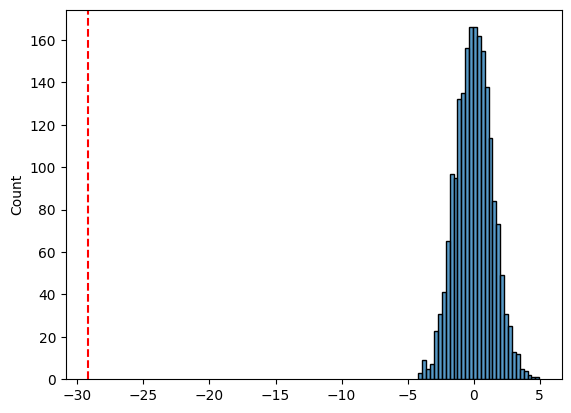

Values more extreme than observed: 0
p-value: 0.0
H0 rejected | the observed result is statistically significant | p-value <= alpha


In [3]:
df_spending=df_order_payments.merge(df_order_dataset, how='inner', on='order_id').merge(df_customers, how='inner', on='customer_id')
df_spending=df_spending.groupby('customer_id').agg({'customer_state':'first','payment_value':'mean'} ).reset_index() 
df_spending.info()
df_spending.sample(3)

mu_a = np.mean(df_spending[df_spending['customer_state']=='SP']['payment_value'])
mu_b = np.mean(df_spending[df_spending['customer_state']!='SP']['payment_value'])
ab_mu_diff = mu_a - mu_b
print('Observed difference statistic:', round(ab_mu_diff, 4))
n_rounds = 2000
mu_diff_samples = []
for i in range(n_rounds): 
        df_sample1 = df_spending.sample(frac=0.5, replace=False)
        ix2 = set(df_spending.index) - set(df_sample1.index)
        df_sample2 = df_spending.iloc[list(ix2)]
        mu_diff_temp = np.mean(df_sample1["payment_value"]) - np.mean(df_sample2["payment_value"])
        mu_diff_samples.append(mu_diff_temp)

sns.histplot(mu_diff_samples)
plt.axvline(ab_mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
    
print('Values more extreme than observed:', sum([el <= ab_mu_diff for el in mu_diff_samples]))
p_value = sum([el <= ab_mu_diff for el in mu_diff_samples])/n_rounds
print('p-value:', p_value)
    
if p_value <= 0.05: 
        print('H0 rejected | the observed result is statistically significant | p-value <= alpha')
else: 
        print('H0 accepted | the observed result is not statistically significant | p-value > alpha')
#mediamente il cliente di SP spende di meno rispetto agli altri(?)